# Iterative Linear Quadratic Regulator

In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from maths import linalg
import pydrake.symbolic as sym

from control.iLQRController import iLQR
from sim.car import CarModel

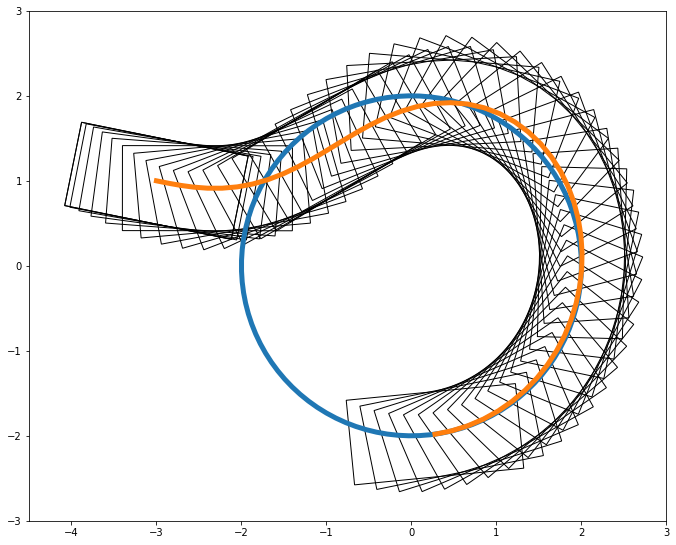

In [2]:
# Setup problem and call iLQR

x0 = np.array([-3.0, 1.0, -0.2, 0.0, 0.0])
# init_u_trj =   [[ 1.36338211e-05,  8.94183692e-05],
#                 [ 5.37071817e-05,  6.97651301e-05],
#                 [-6.04749015e-06,  2.31094596e-05],
#                 [-1.47807957e-04,  1.20689293e-05],
#                 [ 2.96490546e-05,  6.94843513e-05],
#                 [-5.45523997e-05, -1.40412309e-04],
#                 [-6.45097757e-05, -4.81910887e-06],
#                 [ 1.18566538e-04,  3.89476920e-05],
#                 [-8.33425327e-05, -2.65203332e-04],
#                 [-6.82268882e-06, -3.98233863e-05],
#                 [-6.73193804e-05, -1.96344904e-05],
#                 [ 2.08924852e-04,  5.18510834e-05],
#                 [ 7.76574814e-05,  9.77557045e-05],
#                 [ 1.48282519e-05,  5.00330183e-05],
#                 [-1.04506370e-04, -4.44689745e-05],
#                 [-1.39640161e-04, -1.02033615e-04],
#                 [ 2.89836732e-04,  3.38058682e-07],
#                 [ 1.03319822e-04,  1.05263711e-04],
#                 [ 1.48496493e-04, -4.94408084e-05],
#                 [ 3.25317625e-05,  1.40422458e-04],
#                 [-1.07299593e-05, -1.65057796e-04],
#                 [ 1.40173289e-05, -4.96166417e-05],
#                 [ 5.14144785e-05,  5.72995712e-05],
#                 [ 2.32806122e-04, -1.59525662e-06],
#                 [ 5.05340011e-06,  1.48525302e-04],
#                 [ 2.92779688e-05, -1.21758471e-04],
#                 [ 1.89673370e-04,  4.05009150e-06],
#                 [ 3.17822447e-05, -1.67340674e-04],
#                 [-1.57219018e-04,  1.72085840e-04],
#                 [-1.07103831e-04, -8.53208367e-05],
#                 [ 1.84699140e-05, -2.20404401e-04],
#                 [-3.49906508e-05, -6.37132686e-05],
#                 [ 5.87035438e-05,  1.36027892e-04],
#                 [-3.83532187e-06,  2.71667103e-05],
#                 [-2.23271884e-05,  8.79066909e-05],
#                 [ 1.02371269e-04,  1.02984882e-05],
#                 [ 4.01108944e-05, -2.20019493e-04],
#                 [ 1.21943448e-04, -1.27159657e-04],
#                 [ 6.97614502e-05, -3.75259963e-05],
#                 [-9.74332263e-05,  1.58127992e-04],
#                 [ 1.39667582e-04, -4.67217232e-05],
#                 [ 1.16785856e-04,  4.62044637e-05],
#                 [-5.04040286e-05, -6.45689823e-05],
#                 [ 1.75007554e-04, -1.81885395e-05],
#                 [-7.46147588e-05,  8.25649339e-05],
#                 [-3.79094141e-05, -6.31140665e-05],
#                 [ 4.56879464e-05,  2.51684909e-04],
#                 [ 1.14443662e-04, -4.19857758e-05],
#                 [ 1.01203132e-04,  2.10357993e-05]]
# init_u_trj = np.array(init_u_trj)

iLQRParams = {"N": 20,
              "max_iter": 50,
              "regu_init": 100,
              "min_regu": 0.001,
              "max_regu": 10000,
              "max_linesearch_iters": 20
}
r = 2
v_target = 2
u_init_trj = np.random.randn(iLQRParams['N'] - 1, 2) * 0.0001

plant = CarModel(r, v_target)
controller = iLQR(plant, **iLQRParams)

x_trj = x0
u_trj = None
for n in range(50):
    x_ctrl, u_init_trj= controller.run_ilqr(x0, u_init_trj)
    x0 = x_ctrl[1,:]
    u_ctrl = u_init_trj[0, :]
    x_trj = np.vstack((x_trj, x_ctrl[1,:]))
    u_trj = np.vstack((u_trj, u_ctrl)) if u_trj is not None else u_ctrl

# print(u_trj)
plt.figure(figsize=(9.5, 8))
# Plot circle
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(r * np.cos(theta), r * np.sin(theta), linewidth=5)
ax = plt.gca()

# Plot resulting trajecotry of car
plt.plot(x_trj[:, 0], x_trj[:, 1], linewidth=5)
w = 2.0
h = 1.0

# Plot rectangles
for n in range(x_trj.shape[0]):
    rect = mpl.patches.Rectangle((-w / 2, -h / 2), w, h, fill=False)
    t = (
        mpl.transforms.Affine2D()
        .rotate_deg_around(0, 0, np.rad2deg(x_trj[n, 2]))
        .translate(x_trj[n, 0], x_trj[n, 1])
        + ax.transData
    )
    rect.set_transform(t)
    ax.add_patch(rect)
ax.set_aspect(1)
plt.ylim((-3, 3))
plt.xlim((-4.5, 3))
plt.tight_layout()